In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
data = pd.read_csv('data/data.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4021671 entries, 0 to 4021670
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   invoice_id         int64  
 1   customer_id        int64  
 2   date               object 
 3   unit_price         float64
 4   quantity           int64  
 5   sales_channel0     object 
 6   region0            object 
 7   region1            object 
 8   region2            object 
 9   sku_id             int64  
 10  product_name       object 
 11  product_brand0     object 
 12  product_category0  object 
 13  sales_channel1     object 
dtypes: float64(1), int64(4), object(9)
memory usage: 429.6+ MB


In [ ]:
data.head(10)

,invoice_id,customer_id,date,unit_price,quantity,sales_channel0,region0,region1,region2,sku_id,product_name,product_brand0,product_category0,sales_channel1
0,1094105,111823524,2020-11-01T00:00:00,949032.0,-1,stores,US,Florida,Miami,26994365179,long crotch men trousers size 13,Kotte,trousers,Ruder
1,1094472,113924136,2020-11-01T00:00:00,1560000.0,-3,stores,US,California,Norman,5888654879,gift bundle belt and bag,Kotte,set,Ruder
2,1094472,113924136,2020-11-01T00:00:00,1560000.0,-9,stores,US,California,Norman,5888454879,gift bundle pot and dish,Kotte,set,Ruder
3,1094551,110323609,2020-11-01T00:00:00,315228.0,-3,stores,US,Illinois,Chicago,27185425089,size M slim-fit formal shirt,Kotte,shirt,Ruder
4,1094551,110323609,2020-11-01T00:00:00,968400.0,-3,stores,US,Illinois,Chicago,26994365179,long crotch men trousers size 13,Kotte,trousers,Ruder
5,1094552,110125867,2020-11-01T00:00:00,700440.0,-1,stores,US,Florida,Jacksonville,26792365779,casual dress size 11 regular,Kotte,dress,Ruder
6,1094552,110125867,2020-11-01T00:00:00,399600.0,-1,stores,US,Florida,Jacksonville,26792365379,casual dress size 11 slim,Kotte,dress,Ruder
7,1094553,110125602,2020-11-01T00:00:00,968400.0,-1,stores,US,Florida,Jacksonville,26994365179,long crotch men trousers size 13,Kotte,trousers,Ruder
8,1094554,110123641,2020-11-01T00:00:00,182472.0,-1,stores,US,Florida,Jacksonville,26769784979,suit drop 6 size 38,Kotte,suit,Ruder
9,1094555,110323530,2020-11-01T00:00:00,313200.0,-3,stores,US,Illinois,Chicago,26996364979,short crotch men trousers size 13,Kotte,trousers,Ruder


In [ ]:
data['sales_value'] = data['quantity'] * data['unit_price']

In [ ]:
time_series_df = data.groupby(['date']).agg({'sales_value': 'sum'})

In [ ]:
time_series_df

,sales_value
date,
2020-10-02T00:00:00,8.708058e+10
2020-10-03T00:00:00,1.045918e+11
2020-10-04T00:00:00,1.069247e+11
2020-10-05T00:00:00,1.073347e+11
2020-10-06T00:00:00,1.083459e+11
...,...
2021-04-30T00:00:00,1.500320e+11
2021-05-01T00:00:00,1.370294e+11
2021-05-02T00:00:00,1.487402e+11


<AxesSubplot:xlabel='date'>

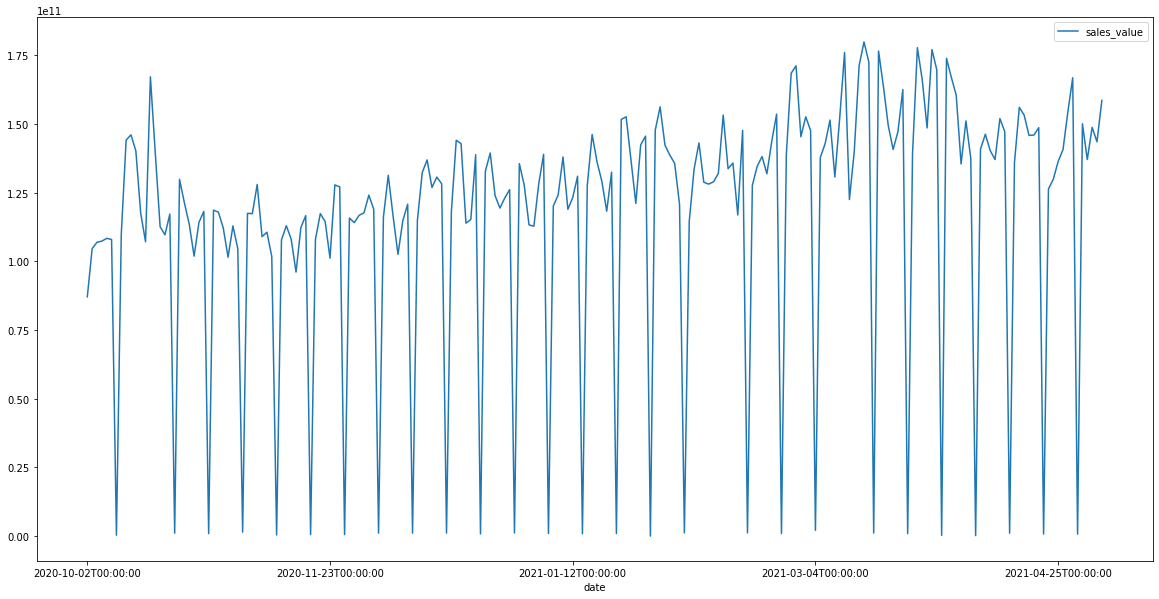

In [ ]:
time_series_df.plot(figsize=(20,10))

In [ ]:
time_series = pd.Series(data=time_series_df['sales_value'], index=time_series_df.index)

In [ ]:
time_series

date
2020-10-02T00:00:00    8.708058e+10
2020-10-03T00:00:00    1.045918e+11
2020-10-04T00:00:00    1.069247e+11
2020-10-05T00:00:00    1.073347e+11
2020-10-06T00:00:00    1.083459e+11
                           ...     
2021-04-30T00:00:00    1.500320e+11
2021-05-01T00:00:00    1.370294e+11
2021-05-02T00:00:00    1.487402e+11
2021-05-03T00:00:00    1.434664e+11
2021-05-04T00:00:00    1.585549e+11
Name: sales_value, Length: 210, dtype: float64

<AxesSubplot:xlabel='date'>

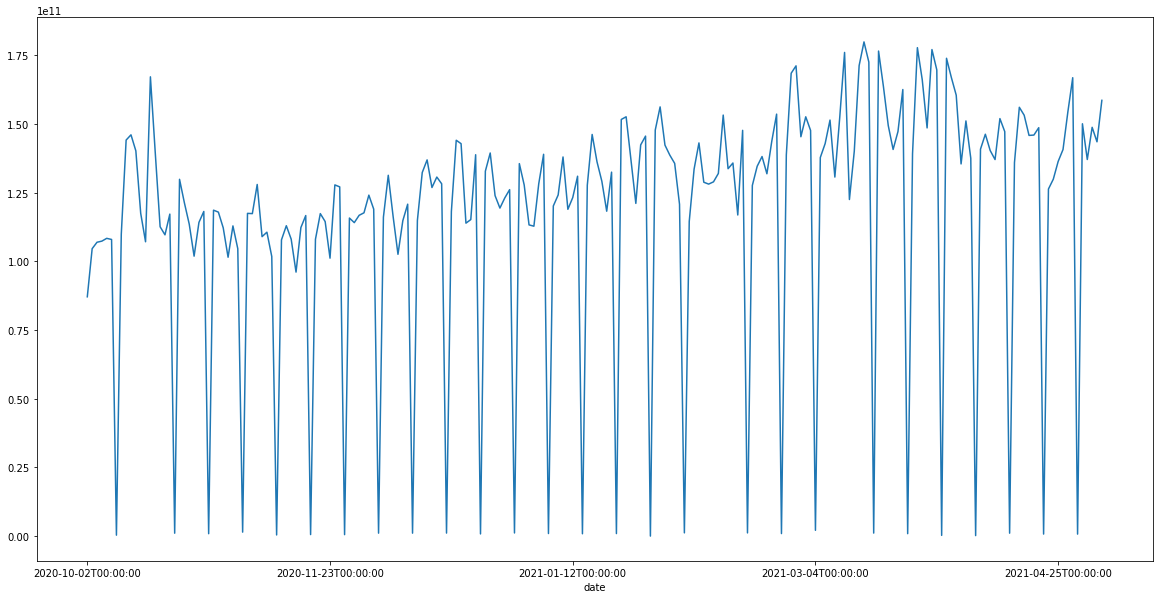

In [ ]:
time_series.plot(figsize=(20,10))

In [ ]:
time_series.index = time_series.index.astype('datetime64[ns]')

In [ ]:
import datetime as dt

In [ ]:
windows = []
for window in time_series.rolling(window='37D'):
  idx = pd.date_range(window.index.min(), window.index.min() + dt.timedelta(days=36))
  windows.append(window.reindex(idx).interpolate())

<AxesSubplot:>

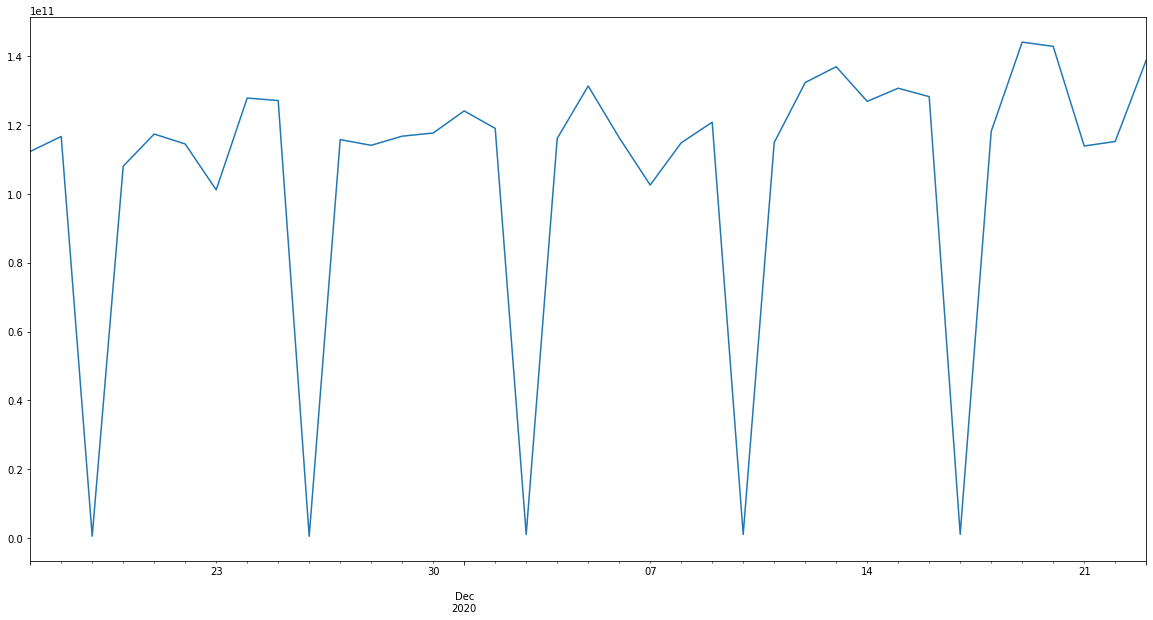

In [ ]:
windows[80].plot(figsize=(20,10))

In [ ]:
windows[3]

2020-10-02    8.708058e+10
2020-10-03    1.045918e+11
2020-10-04    1.069247e+11
2020-10-05    1.073347e+11
2020-10-06    1.073347e+11
2020-10-07    1.073347e+11
2020-10-08    1.073347e+11
2020-10-09    1.073347e+11
2020-10-10    1.073347e+11
2020-10-11    1.073347e+11
2020-10-12    1.073347e+11
2020-10-13    1.073347e+11
2020-10-14    1.073347e+11
2020-10-15    1.073347e+11
2020-10-16    1.073347e+11
2020-10-17    1.073347e+11
2020-10-18    1.073347e+11
2020-10-19    1.073347e+11
2020-10-20    1.073347e+11
2020-10-21    1.073347e+11
2020-10-22    1.073347e+11
2020-10-23    1.073347e+11
2020-10-24    1.073347e+11
2020-10-25    1.073347e+11
2020-10-26    1.073347e+11
2020-10-27    1.073347e+11
2020-10-28    1.073347e+11
2020-10-29    1.073347e+11
2020-10-30    1.073347e+11
2020-10-31    1.073347e+11
2020-11-01    1.073347e+11
2020-11-02    1.073347e+11
2020-11-03    1.073347e+11
2020-11-04    1.073347e+11
2020-11-05    1.073347e+11
2020-11-06    1.073347e+11
2020-11-07    1.073347e+11
F

In [ ]:
windows = windows[36:]

In [ ]:
train = windows[:150]
dev = windows[150:158]
test = windows[158:]

In [ ]:
SCALE = 10e10

In [ ]:
X_train = np.float32(np.array([series[:-7].values for series in train])) / SCALE
y_train = np.float32([sum(series[-7:]) for series in train]) / SCALE
X_valid = np.float32(np.array([series[:-7].values for series in dev])) /SCALE
y_valid = np.float32([sum(series[-7:]) for series in dev]) / SCALE
X_test = np.float32(np.array([series[:-7].values for series in test])) /SCALE
y_test = np.float32([sum(series[-7:]) for series in test]) /SCALE

### Naive forcasting


In [ ]:
y_pred = X_valid[:, -1]

In [ ]:
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

0.5556809

In [ ]:
y_pred

array([0.1604301 , 0.13542087, 0.15106194, 0.13747822, 0.00019928,
       0.14078988, 0.13701302, 0.13701302], dtype=float32)

In [ ]:
y_valid

array([0.851455  , 0.85304713, 0.8538996 , 0.86359465, 0.86447287,
       0.85956603, 0.90413094, 0.8983542 ], dtype=float32)

In [ ]:
X_train.shape

(150, 30)

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[30, 1]),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(16),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(8),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(4),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(2),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(1),
])

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=keras.losses.MeanSquaredError(),
)

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30)                0         
_________________________________________________________________
batch_normalization_38 (Batc (None, 30)                120       
_________________________________________________________________
dense_14 (Dense)             (None, 16)                496       
_________________________________________________________________
batch_normalization_39 (Batc (None, 16)                64        
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 136       
_________________________________________________________________
batch_normalization_40 (Batc (None, 8)                 32        
_________________________________________________________________
dense_16 (Dense)             (None, 4)               

In [ ]:
model.fit(
    X_train.reshape(150,30,1), y_train.reshape(150,1),
    epochs=100,
    batch_size=8,
    validation_data=(X_valid.reshape(8,30,1), y_valid.reshape(8,1)),
)

Epoch 1/100
19/19 [==============================] - 2s 27ms/step - loss: 1.4803 - val_loss: 0.0271
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 0.2651 - val_loss: 0.0030
Epoch 3/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0156 - val_loss: 0.0065
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0109 - val_loss: 0.0111
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0049 - val_loss: 0.0106
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0053 - val_loss: 0.0064
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0064 - val_loss: 0.0052
Epoch 8/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0050 - val_loss: 0.0040
Epoch 9/100
19/19 [==============================] - 0s 10ms/step - loss: 0.0052 - val_loss: 0.0028
Epoch 10/100
19/19 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 0.0032
E

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 247ms/step - loss: 0.0012


0.0011995905078947544

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
np.mean(keras.losses.mean_squared_error(y_test, y_pred))

0.0017761592

In [ ]:
y_test

array([0.8910094 , 0.88501394, 0.88644344, 0.8861221 , 0.87653   ,
       0.8503767 , 0.8335545 , 0.8284152 , 0.83685523, 0.8550417 ,
       0.8550275 , 0.8787685 , 0.8859235 , 0.8983467 , 0.90115803,
       0.90535396], dtype=float32)

In [ ]:
y_pred

array([[0.9424572 ],
       [0.94517374],
       [0.93735194],
       [0.9144602 ],
       [0.8713944 ],
       [0.8983563 ],
       [0.8870723 ],
       [0.85444546],
       [0.85490906],
       [0.8602648 ],
       [0.85064363],
       [0.8600632 ],
       [0.86078155],
       [0.8794551 ],
       [0.86467505],
       [0.8804511 ]], dtype=float32)

In [ ]:
mpe = [x/y for x,y in zip(np.float32([sum(series[-7:]) for series in test]), y_pred*SCALE)]
mpe = [x[0] for x in mpe]
mpe

[0.9454109,
 0.9363505,
 0.94568896,
 0.9690111,
 1.0058936,
 0.9465918,
 0.9396692,
 0.9695355,
 0.97888213,
 0.9939285,
 1.0051535,
 1.0217488,
 1.0292083,
 1.021481,
 1.0421927,
 1.0282842]

<AxesSubplot:>

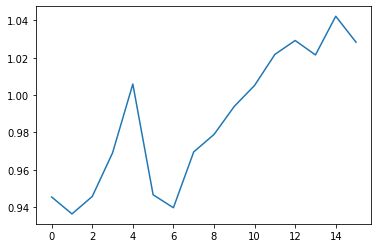

In [ ]:
pd.Series(mpe).plot()

In [ ]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", n_steps=30):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

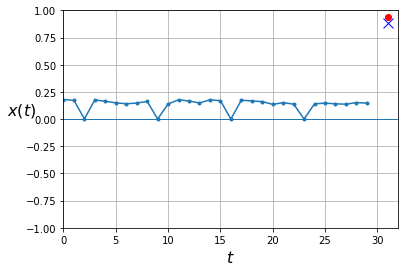

In [ ]:
y_pred = model.predict(X_valid)
plot_series(X_test[2, :], y_test[2], y_pred[2])
plt.show()

This plot shows after one week, the model would be expired and must be retrained

### Simple RNN

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
model = keras.models.Sequential([
    keras.layers.BatchNormalization(input_shape=[None, 1]),
    keras.layers.SimpleRNN(16,  return_sequences=True, input_shape=[None, 1], activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(8, return_sequences=True, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.SimpleRNN(4, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1, activation='relu'),
])

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.005),
    loss=keras.losses.MeanSquaredError(),
)

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_47 (Batc (None, None, 1)           4         
_________________________________________________________________
simple_rnn_27 (SimpleRNN)    (None, None, 16)          288       
_________________________________________________________________
batch_normalization_48 (Batc (None, None, 16)          64        
_________________________________________________________________
simple_rnn_28 (SimpleRNN)    (None, None, 8)           200       
_________________________________________________________________
batch_normalization_49 (Batc (None, None, 8)           32        
_________________________________________________________________
simple_rnn_29 (SimpleRNN)    (None, 4)                 52        
_________________________________________________________________
batch_normalization_50 (Batc (None, 4)               

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='auto',
    restore_best_weights=True) 

In [ ]:
history = model.fit(
    X_train.reshape(150,30,1),
    y_train.reshape(150,1),
    epochs=50,
    batch_size=8,
    callbacks=[early_stopping],
    validation_data=(X_valid.reshape(8,30,1), y_valid.reshape(8,1)),
)

Epoch 1/50
19/19 [==============================] - 5s 104ms/step - loss: 0.6030 - val_loss: 0.7548
Epoch 2/50
19/19 [==============================] - 1s 79ms/step - loss: 0.4735 - val_loss: 0.7548
Epoch 3/50
19/19 [==============================] - 2s 81ms/step - loss: 0.4742 - val_loss: 0.7548
Epoch 4/50
19/19 [==============================] - 2s 81ms/step - loss: 0.4213 - val_loss: 0.6911
Epoch 5/50
19/19 [==============================] - 2s 80ms/step - loss: 0.3130 - val_loss: 0.1506
Epoch 6/50
19/19 [==============================] - 1s 79ms/step - loss: 0.3013 - val_loss: 0.0392
Epoch 7/50
19/19 [==============================] - 1s 78ms/step - loss: 0.1971 - val_loss: 0.0096
Epoch 8/50
19/19 [==============================] - 1s 79ms/step - loss: 0.0744 - val_loss: 0.0267
Epoch 9/50
19/19 [==============================] - 2s 79ms/step - loss: 0.0348 - val_loss: 0.4071
Epoch 10/50
19/19 [==============================] - 2s 81ms/step - loss: 0.0212 - val_loss: 0.2849
Epoch 11

In [ ]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
#     plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

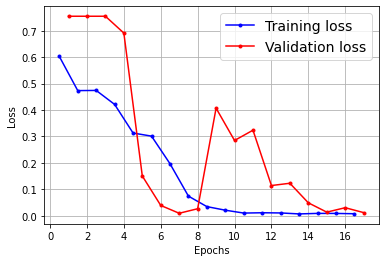

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
model.evaluate(X_test.reshape(16,30,1), y_test.reshape(16,1))

1/1 [==============================] - 1s 806ms/step - loss: 0.0113


0.011301240883767605

In [ ]:
y_pred = model.predict(X_test.reshape(16,30,1))

In [ ]:
y_pred

array([[0.74068034],
       [0.7619708 ],
       [0.8111252 ],
       [0.89198035],
       [0.82028383],
       [0.77008176],
       [0.7395392 ],
       [0.7490131 ],
       [0.77361876],
       [0.8195312 ],
       [0.8987309 ],
       [0.82043785],
       [0.76304805],
       [0.72774255],
       [0.727114  ],
       [0.739366  ]], dtype=float32)

In [ ]:
y_test

array([0.8910094 , 0.88501394, 0.88644344, 0.8861221 , 0.87653   ,
       0.8503767 , 0.8335545 , 0.8284152 , 0.83685523, 0.8550417 ,
       0.8550275 , 0.8787685 , 0.8859235 , 0.8983467 , 0.90115803,
       0.90535396], dtype=float32)

In [ ]:
mpe = [x/y for x,y in zip(y_test*SCALE, y_pred*SCALE)]
mpe = [x[0] for x in mpe]
mpe

[1.2029607,
 1.1614801,
 1.0928564,
 0.9934323,
 1.0685691,
 1.1042681,
 1.1271268,
 1.106009,
 1.0817411,
 1.0433302,
 0.9513721,
 1.071097,
 1.1610324,
 1.2344292,
 1.2393627,
 1.2245004]

<AxesSubplot:>

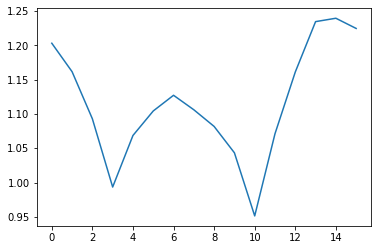

In [ ]:
# mpe = [x[0] for x in mpe]
pd.Series(mpe).plot()

### Fighting the Unstable Gradients

In [ ]:
model = keras.models.Sequential([
    keras.layers.LayerNormalization(input_shape=[None, 1]),
    keras.layers.SimpleRNN(16,  return_sequences=True, input_shape=[None, 1]),
    keras.layers.LayerNormalization(),
    keras.layers.SimpleRNN(8, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.SimpleRNN(4),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(1),
])

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.005),
    loss=keras.losses.MeanSquaredError(),
)

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_normalization_4 (Layer (None, None, 1)           2         
_________________________________________________________________
simple_rnn_33 (SimpleRNN)    (None, None, 16)          288       
_________________________________________________________________
layer_normalization_5 (Layer (None, None, 16)          32        
_________________________________________________________________
simple_rnn_34 (SimpleRNN)    (None, None, 8)           200       
_________________________________________________________________
layer_normalization_6 (Layer (None, None, 8)           16        
_________________________________________________________________
simple_rnn_35 (SimpleRNN)    (None, 4)                 52        
_________________________________________________________________
layer_normalization_7 (Layer (None, 4)               

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    verbose=1,
    patience=10,
    mode='auto',
    restore_best_weights=True) 

In [ ]:
history = model.fit(
    X_train.reshape(150,30,1),
    y_train.reshape(150,1),
    epochs=50,
    batch_size=8,
    callbacks=[early_stopping],
    validation_data=(X_valid.reshape(8,30,1), y_valid.reshape(8,1)),
)

Epoch 1/50
19/19 [==============================] - 5s 128ms/step - loss: 0.0779 - val_loss: 0.0019
Epoch 2/50
19/19 [==============================] - 2s 82ms/step - loss: 0.0140 - val_loss: 0.0027
Epoch 3/50
19/19 [==============================] - 2s 85ms/step - loss: 0.0128 - val_loss: 0.0040
Epoch 4/50
19/19 [==============================] - 2s 85ms/step - loss: 0.0114 - val_loss: 0.0225
Epoch 5/50
19/19 [==============================] - 2s 80ms/step - loss: 0.0173 - val_loss: 0.0110
Epoch 6/50
19/19 [==============================] - 2s 83ms/step - loss: 0.0117 - val_loss: 0.0092
Epoch 7/50
19/19 [==============================] - 2s 84ms/step - loss: 0.0119 - val_loss: 7.8646e-04
Epoch 8/50
19/19 [==============================] - 2s 81ms/step - loss: 0.0123 - val_loss: 4.6413e-04
Epoch 9/50
19/19 [==============================] - 2s 82ms/step - loss: 0.0121 - val_loss: 0.0031
Epoch 10/50
19/19 [==============================] - 1s 71ms/step - loss: 0.0121 - val_loss: 0.0043


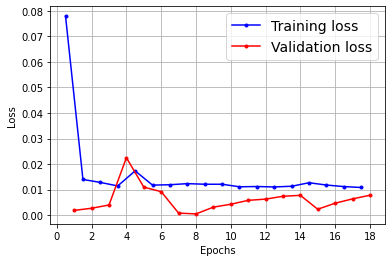

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
model.evaluate(X_test.reshape(16,30,1), y_test.reshape(16,1))

1/1 [==============================] - 1s 721ms/step - loss: 6.2729e-04


0.0006272915052250028

In [ ]:
y_pred = model.predict(X_valid.reshape(8,30,1))

In [ ]:
y_pred

array([[0.87784976],
       [0.87784976],
       [0.87784976],
       [0.87784976],
       [0.87784976],
       [0.87784976],
       [0.87784976],
       [0.87784976]], dtype=float32)

In [ ]:
mpe = [x/y for x,y in zip(y_valid*SCALE, y_pred*SCALE)]
mpe = [x[0] for x in mpe]
mpe

[0.9699325,
 0.97174615,
 0.9727173,
 0.98376137,
 0.9847618,
 0.97917217,
 1.0299381,
 1.0233576]

<AxesSubplot:>

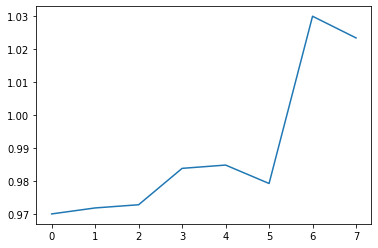

In [ ]:
pd.Series(mpe).plot()

In [ ]:
y_test

array([0.8910094 , 0.88501394, 0.88644344, 0.8861221 , 0.87653   ,
       0.8503767 , 0.8335545 , 0.8284152 , 0.83685523, 0.8550417 ,
       0.8550275 , 0.8787685 , 0.8859235 , 0.8983467 , 0.90115803,
       0.90535396], dtype=float32)

#### LSTM

In [ ]:
model = keras.models.Sequential([
    keras.layers.LayerNormalization(input_shape=[None, 1]),
    keras.layers.LSTM(16,  return_sequences=True, input_shape=[None, 1]),
    keras.layers.LayerNormalization(),
    keras.layers.LSTM(8, return_sequences=True),
    keras.layers.LayerNormalization(),
    keras.layers.LSTM(4),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(1),
])

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.005),
    loss=keras.losses.MeanSquaredError(),
)

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_normalization_16 (Laye (None, None, 1)           2         
_________________________________________________________________
lstm_6 (LSTM)                (None, None, 16)          1152      
_________________________________________________________________
layer_normalization_17 (Laye (None, None, 16)          32        
_________________________________________________________________
lstm_7 (LSTM)                (None, None, 8)           800       
_________________________________________________________________
layer_normalization_18 (Laye (None, None, 8)           16        
_________________________________________________________________
lstm_8 (LSTM)                (None, 4)                 208       
_________________________________________________________________
layer_normalization_19 (Laye (None, 4)               

In [ ]:
history = model.fit(
    X_train.reshape(150,30,1),
    y_train.reshape(150,1),
    epochs=50,
    batch_size=8,
    callbacks=[early_stopping],
    validation_data=(X_valid.reshape(8,30,1), y_valid.reshape(8,1)),
)

Epoch 1/50
19/19 [==============================] - 10s 251ms/step - loss: 30.6487 - val_loss: 26.5982
Epoch 2/50
19/19 [==============================] - 3s 166ms/step - loss: 18.2311 - val_loss: 16.6008
Epoch 3/50
19/19 [==============================] - 3s 162ms/step - loss: 10.3319 - val_loss: 8.6486
Epoch 4/50
19/19 [==============================] - 3s 158ms/step - loss: 4.8971 - val_loss: 3.5973
Epoch 5/50
19/19 [==============================] - 3s 162ms/step - loss: 2.1400 - val_loss: 1.3014
Epoch 6/50
19/19 [==============================] - 3s 157ms/step - loss: 1.2331 - val_loss: 0.5098
Epoch 7/50
19/19 [==============================] - 3s 168ms/step - loss: 1.0703 - val_loss: 0.3291
Epoch 8/50
19/19 [==============================] - 3s 160ms/step - loss: 1.0696 - val_loss: 0.2985
Epoch 9/50
19/19 [==============================] - 3s 163ms/step - loss: 1.0771 - val_loss: 0.2492
Epoch 10/50
19/19 [==============================] - 3s 156ms/step - loss: 1.0717 - val_loss: 

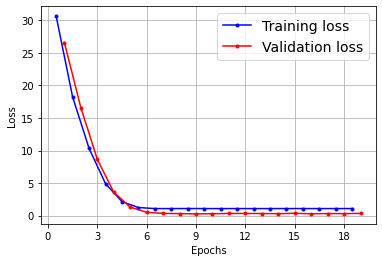

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [ ]:
model.evaluate(X_test.reshape(16,30,1), y_test.reshape(16,1))

1/1 [==============================] - 3s 3s/step - loss: 0.3048


0.30480822920799255

In [ ]:
y_pred = model.predict(X_valid.reshape(8,30,1))

In [ ]:
y_pred

array([[8.225874],
       [8.225874],
       [8.225874],
       [8.225874],
       [8.225874],
       [8.225874],
       [8.225874],
       [8.225874]], dtype=float32)

In [ ]:
mpe = [x/y for x,y in zip(y_valid*SCALE, y_pred*SCALE)]
mpe = [x[0] for x in mpe]
mpe

[1.0350937,
 1.0370293,
 1.0380657,
 1.0498517,
 1.0509192,
 1.0449541,
 1.0991306,
 1.092108]

<AxesSubplot:>

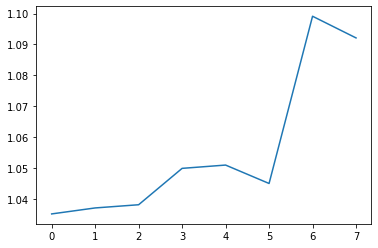

In [ ]:
pd.Series(mpe).plot()

### Forecasting Look Ahead

In [ ]:
X_train = np.float32(np.array([series[:-7].values for series in train])) / SCALE
y_train = np.float32([series[-7:] for series in train]) / SCALE
X_valid = np.float32(np.array([series[:-7].values for series in dev])) /SCALE
y_valid = np.float32([series[-7:] for series in dev]) / SCALE
X_test = np.float32(np.array([series[:-7].values for series in test])) /SCALE
y_test = np.float32([series[-7:] for series in test]) /SCALE

In [ ]:
model = keras.models.Sequential([
                                 keras.layers.Flatten(input_shape=[30, 1]),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(32),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(16),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(8),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dense(7),
])

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=keras.losses.MeanSquaredError(),
)

In [ ]:
history = model.fit(
    X_train.reshape(150,30,1),
    y_train.reshape(150,7),
    epochs=50,
    batch_size=8,
    callbacks=[early_stopping],
    validation_data=(X_valid.reshape(8,30,1), y_valid.reshape(8,7)),
)

Epoch 1/50
19/19 [==============================] - 2s 23ms/step - loss: 1.3862 - val_loss: 0.9066
Epoch 2/50
19/19 [==============================] - 0s 6ms/step - loss: 0.4911 - val_loss: 0.6435
Epoch 3/50
19/19 [==============================] - 0s 8ms/step - loss: 0.1842 - val_loss: 0.4582
Epoch 4/50
19/19 [==============================] - 0s 8ms/step - loss: 0.1358 - val_loss: 0.3276
Epoch 5/50
19/19 [==============================] - 0s 9ms/step - loss: 0.1156 - val_loss: 0.3120
Epoch 6/50
19/19 [==============================] - 0s 9ms/step - loss: 0.1141 - val_loss: 0.1319
Epoch 7/50
19/19 [==============================] - 0s 9ms/step - loss: 0.1088 - val_loss: 0.0992
Epoch 8/50
19/19 [==============================] - 0s 9ms/step - loss: 0.1143 - val_loss: 0.0915
Epoch 9/50
19/19 [==============================] - 0s 9ms/step - loss: 0.1114 - val_loss: 0.0907
Epoch 10/50
19/19 [==============================] - 0s 10ms/step - loss: 0.0935 - val_loss: 0.0946
Epoch 11/50
19/19

In [ ]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[13, :])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[13, :], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[13, :], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -2, 2])
    plt.legend(fontsize=14)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[ 1.6243522 ,  1.5402108 , -0.10627362,  1.5880687 ,  1.4131043 ,
         1.505975  ,  1.4434953 ],
       [ 1.5478265 , -0.4593065 ,  1.6340802 ,  1.4960638 ,  1.4914229 ,
         1.4354877 ,  1.6494788 ],
       [-0.17866045,  1.7812625 ,  1.6355009 ,  1.6279491 ,  1.5786414 ,
         1.6298423 ,  1.7811635 ],
       [ 1.7183573 ,  1.4229714 ,  1.5654134 ,  1.3537606 ,  1.5631425 ,
         1.7447314 , -0.13126245],
       [ 1.5513084 ,  1.6532005 ,  1.4086773 ,  1.4440819 ,  1.4017875 ,
        -0.15030795,  1.4184198 ],
       [ 1.4824727 ,  1.3430347 ,  1.7410278 ,  1.5438263 , -0.2865191 ,
         1.642457  ,  1.6707582 ],
       [ 1.3618522 ,  1.5540459 ,  1.5847198 , -0.0287219 ,  1.5086069 ,
         1.6040223 ,  1.5075612 ],
       [ 1.5234513 ,  1.408647  , -0.13014972,  1.3527683 ,  1.4847317 ,
         1.6007304 ,  1.3606708 ],
       [ 1.4555123 , -0.44345203,  1.5063047 ,  1.5279642 ,  1.4281764 ,
         1.2929492 ,  1.5628034 ],
       [-0.2139622 ,  1.5431

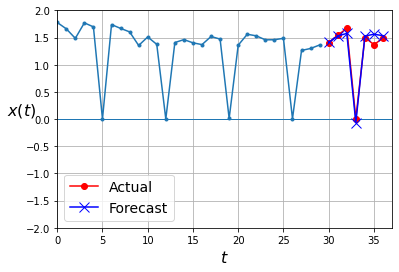

In [ ]:
plot_multiple_forecasts(X_test, y_test, y_pred)
# save_fig("forecast_ahead_plot")
plt.show()